# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

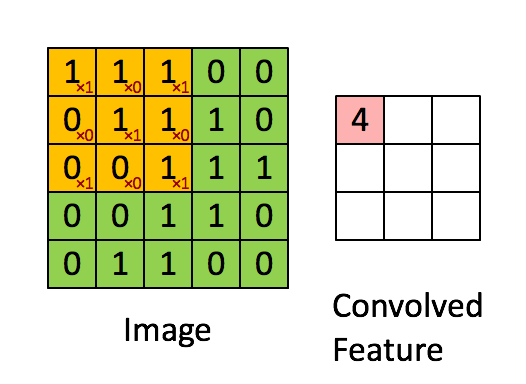

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

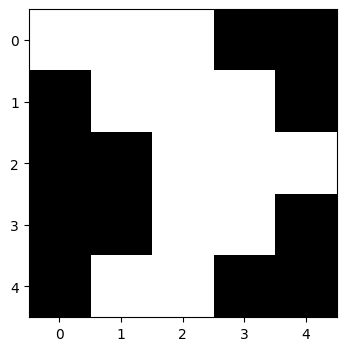

In [ ]:
# Visualizing the input.
plt.imshow(I)

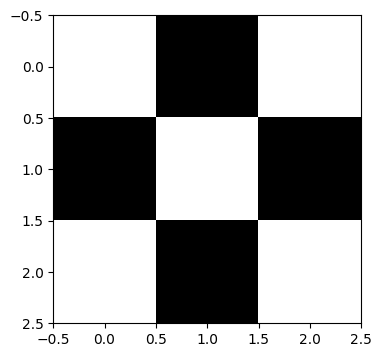

In [ ]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [ ]:
import numpy as np

def convolution(img, filter):
    """
    Performs convolution operation between an input image and a filter.

    Arguments:
    img (ndarray): Input image as a 2D NumPy array.
    filter (ndarray): Filter (kernel) as a 2D NumPy array.

    Returns:
    filter_map (ndarray): Output feature map after applying the filter.
    """
    img_height, img_width = img.shape
    filter_height, filter_width = filter.shape

    # Compute the output dimensions
    output_height = img_height - filter_height + 1
    output_width = img_width - filter_width + 1

    if output_height <= 0 or output_width <= 0:
        raise ValueError("Filter size must be smaller than or equal to the image size.")

    # Initialize the output feature map
    filter_map = np.zeros((output_height, output_width))

    # Perform the convolution operation
    for i in range(output_height):
        for j in range(output_width):
            region = img[i:i + filter_height, j:j + filter_width]
            filter_map[i, j] = np.sum(region * filter)

    return filter_map


In [ ]:
img = convolution(I, K)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


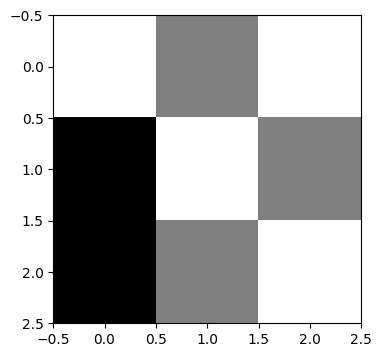

In [ ]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [ ]:
data_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",  # Specify that this dataset is the validation set
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


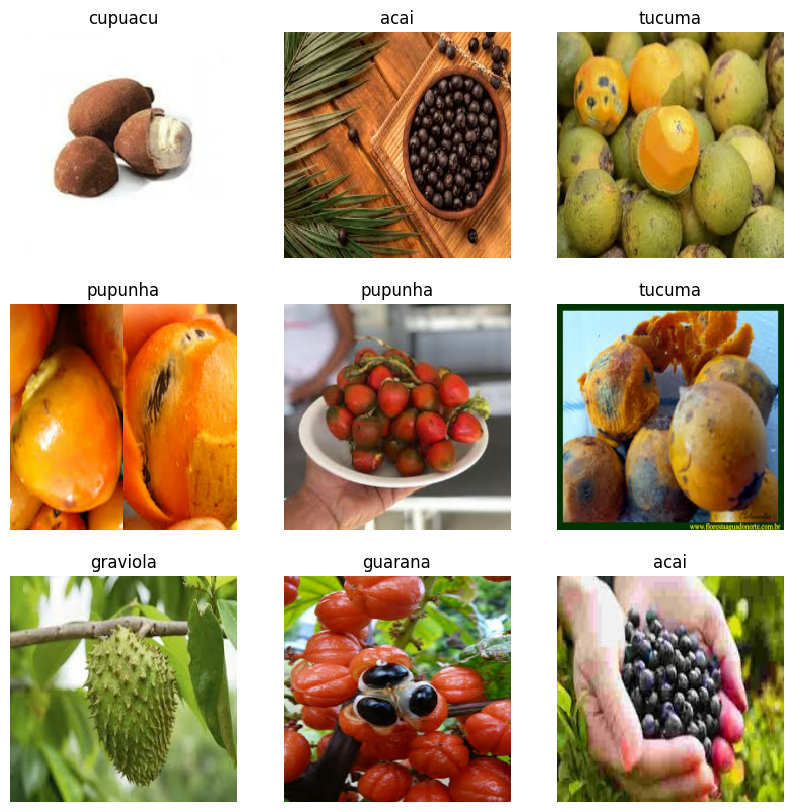

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with set of hyperparameters defined above.
    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in image (1 for grayscale, 3 for RGB).
    num_classes[int] = Number of classes in dataset.
    Output Args:
    model-> A CNN model.
    """

    model = tf.keras.Sequential([
        # Input layer with defined input shape
        layers.Input(shape=(image_height, image_width, nchannels)),

        # Rescaling layer
        layers.Rescaling(1/255),

        # First Block of Convolution and Pooling Operations
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),

        # Second Block of Convolution and Pooling Operations
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),

        # Global Average Pooling layer instead of Flatten
        layers.GlobalAveragePooling2D(),

        # Fully connected classifier
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")  # Use num_classes for dynamic class output
    ])

    return model

img_height = 180
img_width = 180

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,486 (111.27 KB)

 Trainable params: 28,486 (111.27 KB)

 Non-trainable params: 0 (0.00 B)

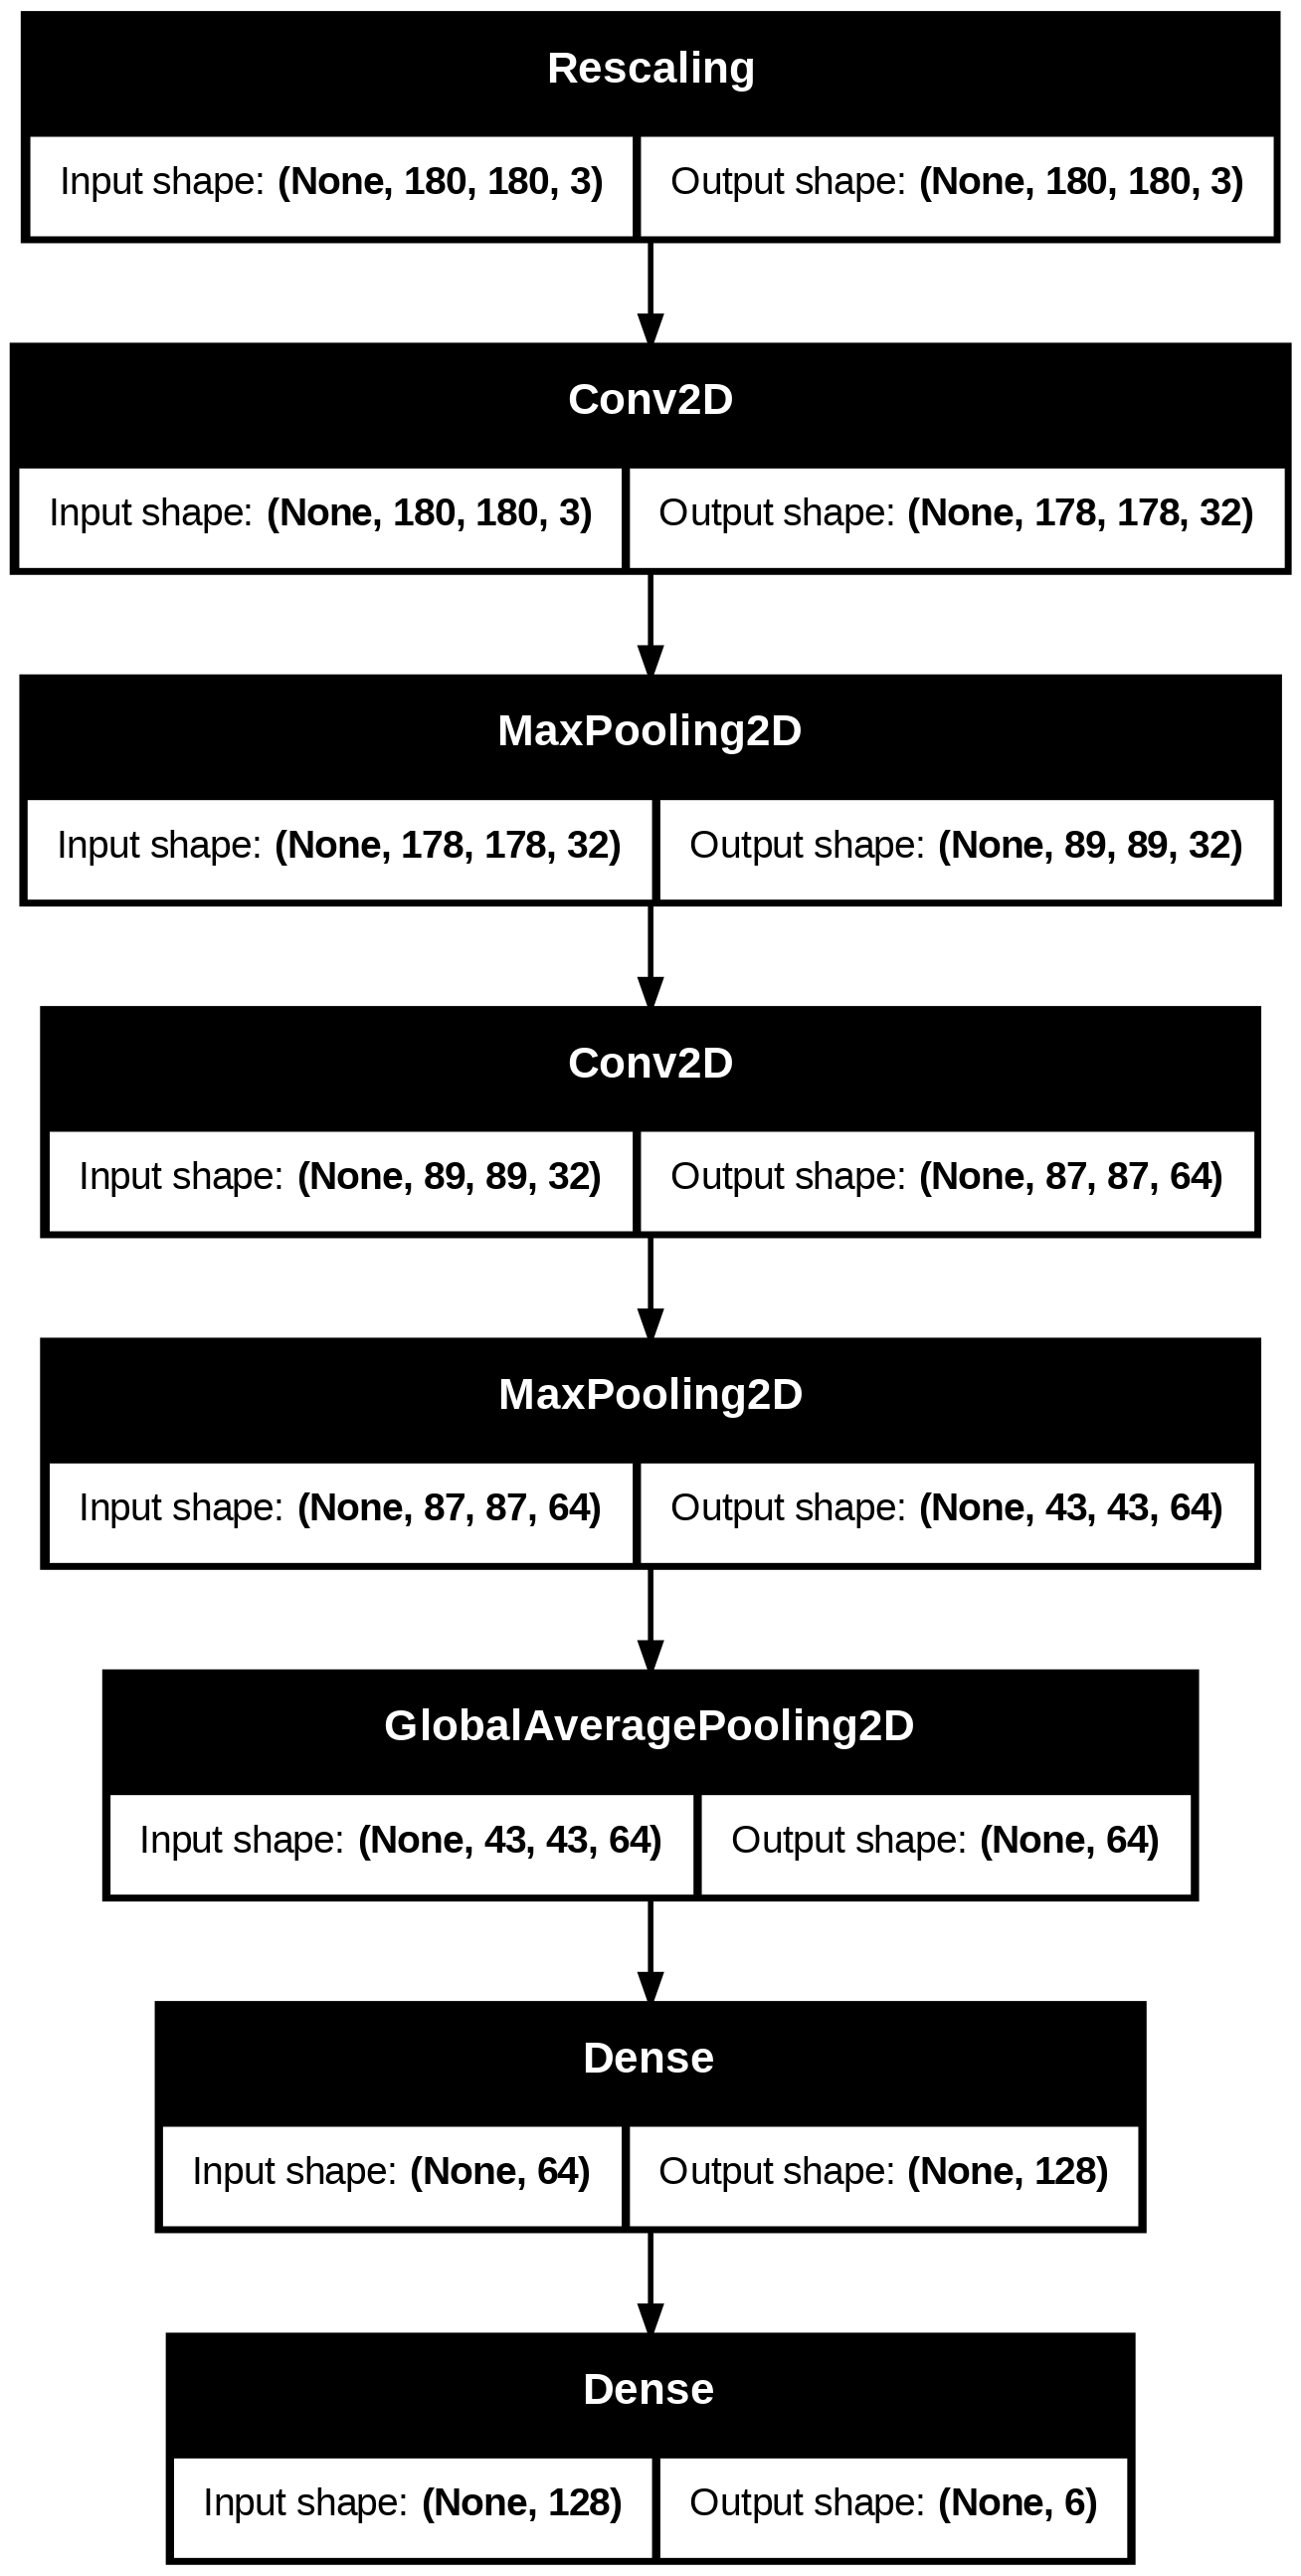

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [ ]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])


### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [ ]:
epochs=250
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3759 - loss: 1.6030 - val_accuracy: 0.2222 - val_loss: 1.7401
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3134 - loss: 1.5734 - val_accuracy: 0.1667 - val_loss: 1.7710
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4023 - loss: 1.5073 - val_accuracy: 0.2222 - val_loss: 1.7843
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3681 - loss: 1.4940 - val_accuracy: 0.2222 - val_loss: 1.7621
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.3750 - loss: 1.4581 - val_accuracy: 0.2222 - val_loss: 1.7269
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4835 - loss: 1.4393 - val_accuracy: 0.3333 - val_loss: 1.6822
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3750 - loss: 1.4220 - val_accuracy: 0.3333 - val_loss: 1.6883
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4223 - loss: 1.3960 - val_accuracy: 0.3333 - val_loss: 1.6927
Epo

## Observe the Model Performance.


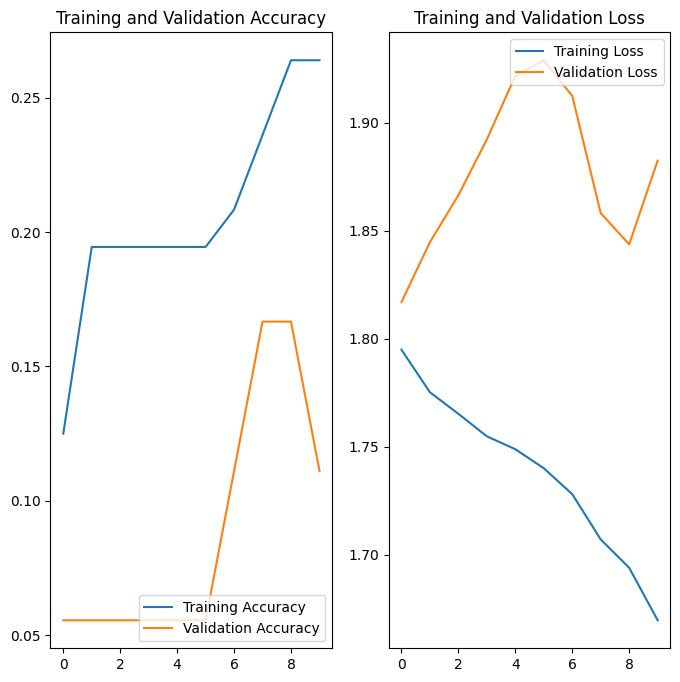

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(train_ds)
print(f"Training accuracy: {test_acc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.3377 - loss: 1.6017
Training accuracy: 0.3472


## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [ ]:
data_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",  # This loads the validation (testing) subset
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
class_names = test_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


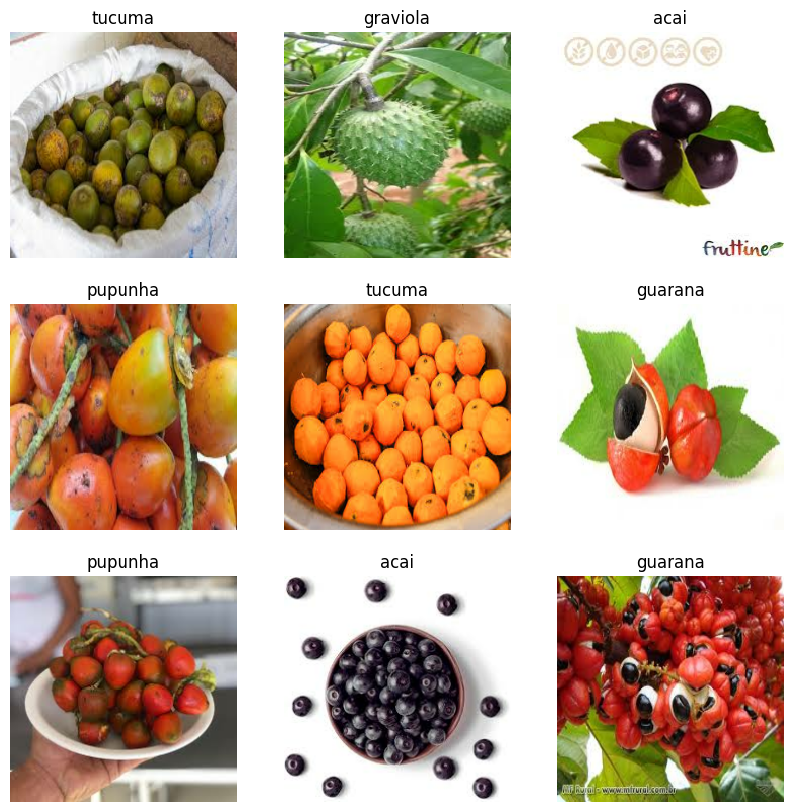

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(18, 224, 224, 3)
(18,)


In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,486 (111.27 KB)

 Trainable params: 28,486 (111.27 KB)

 Non-trainable params: 0 (0.00 B)

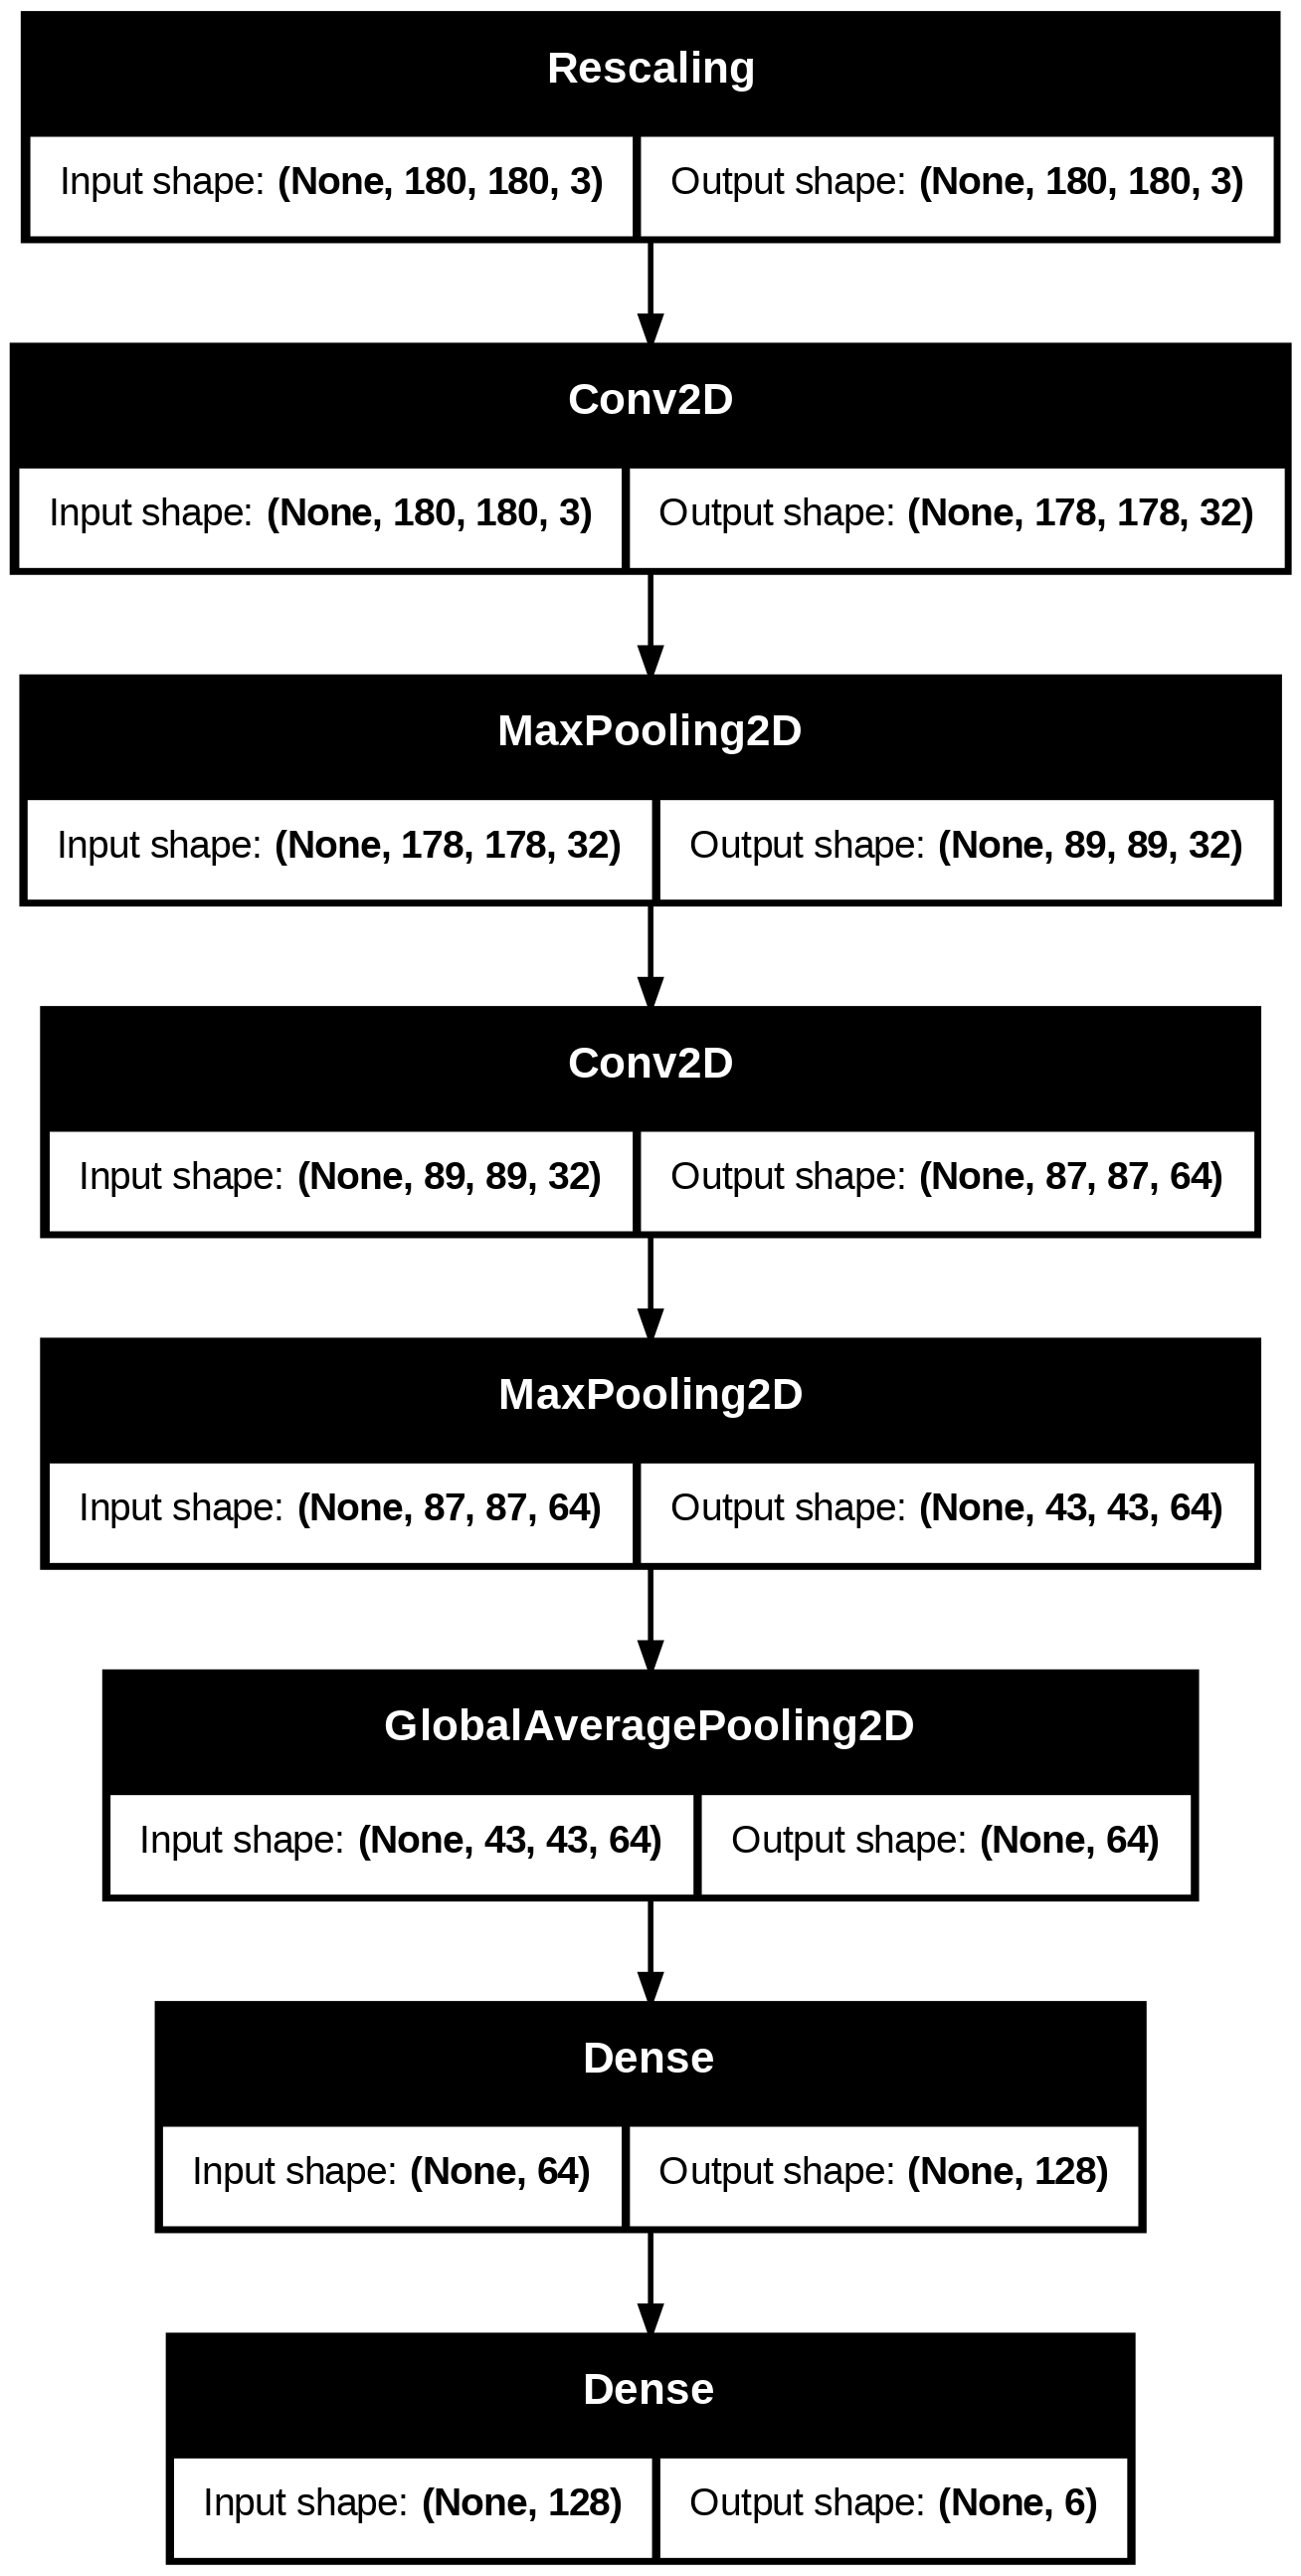

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])


In [ ]:
epochs=250
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8446 - loss: 0.3134 - val_accuracy: 0.4444 - val_loss: 1.6480
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8633 - loss: 0.3176 - val_accuracy: 0.4444 - val_loss: 1.6006
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8594 - loss: 0.2955 - val_accuracy: 0.5556 - val_loss: 1.5696
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8555 - loss: 0.3103 - val_accuracy: 0.5556 - val_loss: 1.5119
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8338 - loss: 0.3197 - val_accuracy: 0.5000 - val_loss: 1.5775
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8859 - loss: 0.2809 - val_accuracy: 0.5000 - val_loss: 1.7715
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8750 - loss: 0.3043 - val_accuracy: 0.4444 - val_loss: 1.7449
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8859 - loss: 0.2990 - val_accuracy: 0.4444 - val_loss: 1.6736
Epoch

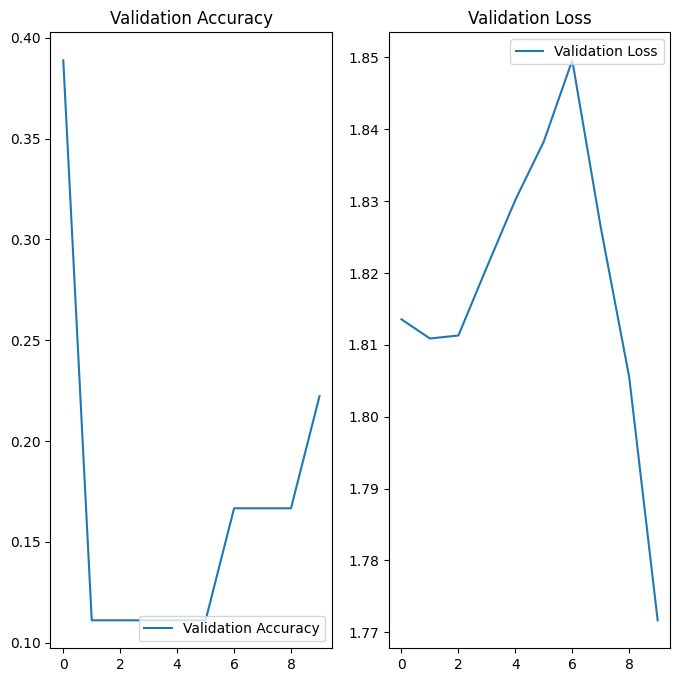

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.1667 - loss: 1.7696
Test accuracy: 0.1667
